<a href="https://colab.research.google.com/github/vdslab/VoronoiTreemapWordCloud/blob/main/notebooks/voronoi_treemap_word_clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,568 kB]
Hit:14 http://pp

In [2]:
!sudo apt install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
curl is already the newest version (7.58.0-2ubuntu3.21).
git is already the newest version (1:2.17.1-1ubuntu0.13).
xz-utils is already the newest version (5.2.2-1.3ubuntu0.1).
xz-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-ipadic mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-ipadic
  mecab-ipadic-utf8 mecab-jumandic mecab-jumandic-utf8 mecab-utils
0 upgraded, 11 newly installed, 0 to remove and 22 not upgraded.
Need to get 29.3 MB of archives.
After this operation, 282 MB of ad

In [3]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [4]:
!mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -y

[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :     tar => ok
[install-mecab-ipadic-NEologd] :     unxz => ok
[install-mecab-ipadic-NEologd] :     xargs => ok
[install-mecab-ipadic-NEologd] :     grep => ok
[install-mecab-ipadic-NEologd] :     iconv => ok
[install-mecab-ipadic-NEologd] :     patch => ok
[install-mecab-ipadi

In [5]:
!pip install mecab-python3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 7.7 MB/s 


In [6]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!curl -O http://public.shiroyagi.s3.amazonaws.com/latest-ja-word2vec-gensim-model.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  126M  100  126M    0     0  24.6M      0  0:00:05  0:00:05 --:--:-- 27.5M


In [8]:
!unzip latest-ja-word2vec-gensim-model.zip

Archive:  latest-ja-word2vec-gensim-model.zip
  inflating: word2vec.gensim.model   
  inflating: word2vec.gensim.model.syn1neg.npy  
  inflating: word2vec.gensim.model.wv.syn0.npy  


In [73]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# JP Word2Vec Distance Matrix

In [10]:
from gensim.models.word2vec import Word2Vec

model_path = 'word2vec.gensim.model'
model = Word2Vec.load(model_path)

In [11]:
text = '''メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」
「たくさんの人を殺したのか。」
「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」
「おどろいた。国王は乱心か。」
「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。御命令を拒めば十字架にかけられて、殺されます。きょうは、六人殺されました。」
　聞いて、メロスは激怒した。「呆れた王だ。生かして置けぬ。」
　メロスは、単純な男であった。買い物を、背負ったままで、のそのそ王城にはいって行った。たちまち彼は、巡邏の警吏に捕縛された。調べられて、メロスの懐中からは短剣が出て来たので、騒ぎが大きくなってしまった。メロスは、王の前に引き出された。
「この短刀で何をするつもりであったか。言え！」暴君ディオニスは静かに、けれども威厳を以て問いつめた。その王の顔は蒼白で、眉間の皺は、刻み込まれたように深かった。
「市を暴君の手から救うのだ。」とメロスは悪びれずに答えた。
「おまえがか？」王は、憫笑した。「仕方の無いやつじゃ。おまえには、わしの孤独がわからぬ。」
「言うな！」とメロスは、いきり立って反駁した。「人の心を疑うのは、最も恥ずべき悪徳だ。王は、民の忠誠をさえ疑って居られる。」
「疑うのが、正当の心構えなのだと、わしに教えてくれたのは、おまえたちだ。人の心は、あてにならない。人間は、もともと私慾のかたまりさ。信じては、ならぬ。」暴君は落着いて呟き、ほっと溜息をついた。「わしだって、平和を望んでいるのだが。」
「なんの為の平和だ。自分の地位を守る為か。」こんどはメロスが嘲笑した。「罪の無い人を殺して、何が平和だ。」
「だまれ、下賤の者。」王は、さっと顔を挙げて報いた。「口では、どんな清らかな事でも言える。わしには、人の腹綿の奥底が見え透いてならぬ。おまえだって、いまに、磔になってから、泣いて詫びたって聞かぬぞ。」
「ああ、王は悧巧だ。自惚れているがよい。私は、ちゃんと死ぬる覚悟で居るのに。命乞いなど決してしない。ただ、――」と言いかけて、メロスは足もとに視線を落し瞬時ためらい、「ただ、私に情をかけたいつもりなら、処刑までに三日間の日限を与えて下さい。たった一人の妹に、亭主を持たせてやりたいのです。三日のうちに、私は村で結婚式を挙げさせ、必ず、ここへ帰って来ます。」
「ばかな。」と暴君は、嗄れた声で低く笑った。「とんでもない嘘を言うわい。逃がした小鳥が帰って来るというのか。」
「そうです。帰って来るのです。」メロスは必死で言い張った。「私は約束を守ります。私を、三日間だけ許して下さい。妹が、私の帰りを待っているのだ。そんなに私を信じられないならば、よろしい、この市にセリヌンティウスという石工がいます。私の無二の友人だ。あれを、人質としてここに置いて行こう。私が逃げてしまって、三日目の日暮まで、ここに帰って来なかったら、あの友人を絞め殺して下さい。たのむ、そうして下さい。」
　それを聞いて王は、残虐な気持で、そっと北叟笑んだ。生意気なことを言うわい。どうせ帰って来ないにきまっている。この嘘つきに騙された振りして、放してやるのも面白い。そうして身代りの男を、三日目に殺してやるのも気味がいい。人は、これだから信じられぬと、わしは悲しい顔して、その身代りの男を磔刑に処してやるのだ。世の中の、正直者とかいう奴輩にうんと見せつけてやりたいものさ。
「願いを、聞いた。その身代りを呼ぶがよい。三日目には日没までに帰って来い。おくれたら、その身代りを、きっと殺すぞ。ちょっとおくれて来るがいい。おまえの罪は、永遠にゆるしてやろうぞ。」
「なに、何をおっしゃる。」
「はは。いのちが大事だったら、おくれて来い。おまえの心は、わかっているぞ。」
　メロスは口惜しく、地団駄踏んだ。ものも言いたくなくなった。
　竹馬の友、セリヌンティウスは、深夜、王城に召された。暴君ディオニスの面前で、佳き友と佳き友は、二年ぶりで相逢うた。メロスは、友に一切の事情を語った。セリヌンティウスは無言で首肯き、メロスをひしと抱きしめた。友と友の間は、それでよかった。セリヌンティウスは、縄打たれた。メロスは、すぐに出発した。初夏、満天の星である。
　メロスはその夜、一睡もせず十里の路を急ぎに急いで、村へ到着したのは、翌る日の午前、陽は既に高く昇って、村人たちは野に出て仕事をはじめていた。メロスの十六の妹も、きょうは兄の代りに羊群の番をしていた。よろめいて歩いて来る兄の、疲労困憊の姿を見つけて驚いた。そうして、うるさく兄に質問を浴びせた。
「なんでも無い。」メロスは無理に笑おうと努めた。「市に用事を残して来た。またすぐ市に行かなければならぬ。あす、おまえの結婚式を挙げる。早いほうがよかろう。」
　妹は頬をあからめた。
「うれしいか。綺麗な衣裳も買って来た。さあ、これから行って、村の人たちに知らせて来い。結婚式は、あすだと。」
　メロスは、また、よろよろと歩き出し、家へ帰って神々の祭壇を飾り、祝宴の席を調え、間もなく床に倒れ伏し、呼吸もせぬくらいの深い眠りに落ちてしまった。
　眼が覚めたのは夜だった。メロスは起きてすぐ、花婿の家を訪れた。そうして、少し事情があるから、結婚式を明日にしてくれ、と頼んだ。婿の牧人は驚き、それはいけない、こちらには未だ何の仕度も出来ていない、葡萄の季節まで待ってくれ、と答えた。メロスは、待つことは出来ぬ、どうか明日にしてくれ給え、と更に押してたのんだ。婿の牧人も頑強であった。なかなか承諾してくれない。夜明けまで議論をつづけて、やっと、どうにか婿をなだめ、すかして、説き伏せた。結婚式は、真昼に行われた。新郎新婦の、神々への宣誓が済んだころ、黒雲が空を覆い、ぽつりぽつり雨が降り出し、やがて車軸を流すような大雨となった。祝宴に列席していた村人たちは、何か不吉なものを感じたが、それでも、めいめい気持を引きたて、狭い家の中で、むんむん蒸し暑いのも怺え、陽気に歌をうたい、手を拍った。メロスも、満面に喜色を湛え、しばらくは、王とのあの約束をさえ忘れていた。祝宴は、夜に入っていよいよ乱れ華やかになり、人々は、外の豪雨を全く気にしなくなった。メロスは、一生このままここにいたい、と思った。この佳い人たちと生涯暮して行きたいと願ったが、いまは、自分のからだで、自分のものでは無い。ままならぬ事である。メロスは、わが身に鞭打ち、ついに出発を決意した。あすの日没までには、まだ十分の時が在る。ちょっと一眠りして、それからすぐに出発しよう、と考えた。その頃には、雨も小降りになっていよう。少しでも永くこの家に愚図愚図とどまっていたかった。メロスほどの男にも、やはり未練の情というものは在る。今宵呆然、歓喜に酔っているらしい花嫁に近寄り、
「おめでとう。私は疲れてしまったから、ちょっとご免こうむって眠りたい。眼が覚めたら、すぐに市に出かける。大切な用事があるのだ。私がいなくても、もうおまえには優しい亭主があるのだから、決して寂しい事は無い。おまえの兄の、一ばんきらいなものは、人を疑う事と、それから、嘘をつく事だ。おまえも、それは、知っているね。亭主との間に、どんな秘密でも作ってはならぬ。おまえに言いたいのは、それだけだ。おまえの兄は、たぶん偉い男なのだから、おまえもその誇りを持っていろ。」
　花嫁は、夢見心地で首肯いた。メロスは、それから花婿の肩をたたいて、
「仕度の無いのはお互さまさ。私の家にも、宝といっては、妹と羊だけだ。他には、何も無い。全部あげよう。もう一つ、メロスの弟になったことを誇ってくれ。」
　花婿は揉み手して、てれていた。メロスは笑って村人たちにも会釈して、宴席から立ち去り、羊小屋にもぐり込んで、死んだように深く眠った。
　眼が覚めたのは翌る日の薄明の頃である。メロスは跳ね起き、南無三、寝過したか、いや、まだまだ大丈夫、これからすぐに出発すれば、約束の刻限までには十分間に合う。きょうは是非とも、あの王に、人の信実の存するところを見せてやろう。そうして笑って磔の台に上ってやる。メロスは、悠々と身仕度をはじめた。雨も、いくぶん小降りになっている様子である。身仕度は出来た。さて、メロスは、ぶるんと両腕を大きく振って、雨中、矢の如く走り出た。
　私は、今宵、殺される。殺される為に走るのだ。身代りの友を救う為に走るのだ。王の奸佞邪智を打ち破る為に走るのだ。走らなければならぬ。そうして、私は殺される。若い時から名誉を守れ。さらば、ふるさと。若いメロスは、つらかった。幾度か、立ちどまりそうになった。えい、えいと大声挙げて自身を叱りながら走った。村を出て、野を横切り、森をくぐり抜け、隣村に着いた頃には、雨も止み、日は高く昇って、そろそろ暑くなって来た。メロスは額の汗をこぶしで払い、ここまで来れば大丈夫、もはや故郷への未練は無い。妹たちは、きっと佳い夫婦になるだろう。私には、いま、なんの気がかりも無い筈だ。まっすぐに王城に行き着けば、それでよいのだ。そんなに急ぐ必要も無い。ゆっくり歩こう、と持ちまえの呑気さを取り返し、好きな小歌をいい声で歌い出した。ぶらぶら歩いて二里行き三里行き、そろそろ全里程の半ばに到達した頃、降って湧いた災難、メロスの足は、はたと、とまった。見よ、前方の川を。きのうの豪雨で山の水源地は氾濫し、濁流滔々と下流に集り、猛勢一挙に橋を破壊し、どうどうと響きをあげる激流が、木葉微塵に橋桁を跳ね飛ばしていた。彼は茫然と、立ちすくんだ。あちこちと眺めまわし、また、声を限りに呼びたててみたが、繋舟は残らず浪に浚われて影なく、渡守りの姿も見えない。流れはいよいよ、ふくれ上り、海のようになっている。メロスは川岸にうずくまり、男泣きに泣きながらゼウスに手を挙げて哀願した。「ああ、鎮めたまえ、荒れ狂う流れを！　時は刻々に過ぎて行きます。太陽も既に真昼時です。あれが沈んでしまわぬうちに、王城に行き着くことが出来なかったら、あの佳い友達が、私のために死ぬのです。」
　濁流は、メロスの叫びをせせら笑う如く、ますます激しく躍り狂う。浪は浪を呑み、捲き、煽り立て、そうして時は、刻一刻と消えて行く。今はメロスも覚悟した。泳ぎ切るより他に無い。ああ、神々も照覧あれ！　濁流にも負けぬ愛と誠の偉大な力を、いまこそ発揮して見せる。メロスは、ざんぶと流れに飛び込み、百匹の大蛇のようにのた打ち荒れ狂う浪を相手に、必死の闘争を開始した。満身の力を腕にこめて、押し寄せ渦巻き引きずる流れを、なんのこれしきと掻きわけ掻きわけ、めくらめっぽう獅子奮迅の人の子の姿には、神も哀れと思ったか、ついに憐愍を垂れてくれた。押し流されつつも、見事、対岸の樹木の幹に、すがりつく事が出来たのである。ありがたい。メロスは馬のように大きな胴震いを一つして、すぐにまた先きを急いだ。一刻といえども、むだには出来ない。陽は既に西に傾きかけている。ぜいぜい荒い呼吸をしながら峠をのぼり、のぼり切って、ほっとした時、突然、目の前に一隊の山賊が躍り出た。
「待て。」
「何をするのだ。私は陽の沈まぬうちに王城へ行かなければならぬ。放せ。」
「どっこい放さぬ。持ちもの全部を置いて行け。」
「私にはいのちの他には何も無い。その、たった一つの命も、これから王にくれてやるのだ。」
「その、いのちが欲しいのだ。」
「さては、王の命令で、ここで私を待ち伏せしていたのだな。」
　山賊たちは、ものも言わず一斉に棍棒を振り挙げた。メロスはひょいと、からだを折り曲げ、飛鳥の如く身近かの一人に襲いかかり、その棍棒を奪い取って、
「気の毒だが正義のためだ！」と猛然一撃、たちまち、三人を殴り倒し、残る者のひるむ隙に、さっさと走って峠を下った。一気に峠を駈け降りたが、流石に疲労し、折から午後の灼熱の太陽がまともに、かっと照って来て、メロスは幾度となく眩暈を感じ、これではならぬ、と気を取り直しては、よろよろ二、三歩あるいて、ついに、がくりと膝を折った。立ち上る事が出来ぬのだ。天を仰いで、くやし泣きに泣き出した。ああ、あ、濁流を泳ぎ切り、山賊を三人も撃ち倒し韋駄天、ここまで突破して来たメロスよ。真の勇者、メロスよ。今、ここで、疲れ切って動けなくなるとは情無い。愛する友は、おまえを信じたばかりに、やがて殺されなければならぬ。おまえは、稀代の不信の人間、まさしく王の思う壺だぞ、と自分を叱ってみるのだが、全身萎えて、もはや芋虫ほどにも前進かなわぬ。路傍の草原にごろりと寝ころがった。身体疲労すれば、精神も共にやられる。もう、どうでもいいという、勇者に不似合いな不貞腐れた根性が、心の隅に巣喰った。私は、これほど努力したのだ。約束を破る心は、みじんも無かった。神も照覧、私は精一ぱいに努めて来たのだ。動けなくなるまで走って来たのだ。私は不信の徒では無い。ああ、できる事なら私の胸を截ち割って、真紅の心臓をお目に掛けたい。愛と信実の血液だけで動いているこの心臓を見せてやりたい。けれども私は、この大事な時に、精も根も尽きたのだ。私は、よくよく不幸な男だ。私は、きっと笑われる。私の一家も笑われる。私は友を欺いた。中途で倒れるのは、はじめから何もしないのと同じ事だ。ああ、もう、どうでもいい。これが、私の定った運命なのかも知れない。セリヌンティウスよ、ゆるしてくれ。君は、いつでも私を信じた。私も君を、欺かなかった。私たちは、本当に佳い友と友であったのだ。いちどだって、暗い疑惑の雲を、お互い胸に宿したことは無かった。いまだって、君は私を無心に待っているだろう。ああ、待っているだろう。ありがとう、セリヌンティウス。よくも私を信じてくれた。それを思えば、たまらない。友と友の間の信実は、この世で一ばん誇るべき宝なのだからな。セリヌンティウス、私は走ったのだ。君を欺くつもりは、みじんも無かった。信じてくれ！　私は急ぎに急いでここまで来たのだ。濁流を突破した。山賊の囲みからも、するりと抜けて一気に峠を駈け降りて来たのだ。私だから、出来たのだよ。ああ、この上、私に望み給うな。放って置いてくれ。どうでも、いいのだ。私は負けたのだ。だらしが無い。笑ってくれ。王は私に、ちょっとおくれて来い、と耳打ちした。おくれたら、身代りを殺して、私を助けてくれると約束した。私は王の卑劣を憎んだ。けれども、今になってみると、私は王の言うままになっている。私は、おくれて行くだろう。王は、ひとり合点して私を笑い、そうして事も無く私を放免するだろう。そうなったら、私は、死ぬよりつらい。私は、永遠に裏切者だ。地上で最も、不名誉の人種だ。セリヌンティウスよ、私も死ぬぞ。君と一緒に死なせてくれ。君だけは私を信じてくれるにちがい無い。いや、それも私の、ひとりよがりか？　ああ、もういっそ、悪徳者として生き伸びてやろうか。村には私の家が在る。羊も居る。妹夫婦は、まさか私を村から追い出すような事はしないだろう。正義だの、信実だの、愛だの、考えてみれば、くだらない。人を殺して自分が生きる。それが人間世界の定法ではなかったか。ああ、何もかも、ばかばかしい。私は、醜い裏切り者だ。どうとも、勝手にするがよい。やんぬる哉。――四肢を投げ出して、うとうと、まどろんでしまった。
　ふと耳に、潺々、水の流れる音が聞えた。そっと頭をもたげ、息を呑んで耳をすました。すぐ足もとで、水が流れているらしい。よろよろ起き上って、見ると、岩の裂目から滾々と、何か小さく囁きながら清水が湧き出ているのである。その泉に吸い込まれるようにメロスは身をかがめた。水を両手で掬って、一くち飲んだ。ほうと長い溜息が出て、夢から覚めたような気がした。歩ける。行こう。肉体の疲労恢復と共に、わずかながら希望が生れた。義務遂行の希望である。わが身を殺して、名誉を守る希望である。斜陽は赤い光を、樹々の葉に投じ、葉も枝も燃えるばかりに輝いている。日没までには、まだ間がある。私を、待っている人があるのだ。少しも疑わず、静かに期待してくれている人があるのだ。私は、信じられている。私の命なぞは、問題ではない。死んでお詫び、などと気のいい事は言って居られぬ。私は、信頼に報いなければならぬ。いまはただその一事だ。走れ！　メロス。
　私は信頼されている。私は信頼されている。先刻の、あの悪魔の囁きは、あれは夢だ。悪い夢だ。忘れてしまえ。五臓が疲れているときは、ふいとあんな悪い夢を見るものだ。メロス、おまえの恥ではない。やはり、おまえは真の勇者だ。再び立って走れるようになったではないか。ありがたい！　私は、正義の士として死ぬ事が出来るぞ。ああ、陽が沈む。ずんずん沈む。待ってくれ、ゼウスよ。私は生れた時から正直な男であった。正直な男のままにして死なせて下さい。
　路行く人を押しのけ、跳ねとばし、メロスは黒い風のように走った。野原で酒宴の、その宴席のまっただ中を駈け抜け、酒宴の人たちを仰天させ、犬を蹴とばし、小川を飛び越え、少しずつ沈んでゆく太陽の、十倍も早く走った。一団の旅人と颯っとすれちがった瞬間、不吉な会話を小耳にはさんだ。「いまごろは、あの男も、磔にかかっているよ。」ああ、その男、その男のために私は、いまこんなに走っているのだ。その男を死なせてはならない。急げ、メロス。おくれてはならぬ。愛と誠の力を、いまこそ知らせてやるがよい。風態なんかは、どうでもいい。メロスは、いまは、ほとんど全裸体であった。呼吸も出来ず、二度、三度、口から血が噴き出た。見える。はるか向うに小さく、シラクスの市の塔楼が見える。塔楼は、夕陽を受けてきらきら光っている。
「ああ、メロス様。」うめくような声が、風と共に聞えた。
「誰だ。」メロスは走りながら尋ねた。
「フィロストラトスでございます。貴方のお友達セリヌンティウス様の弟子でございます。」その若い石工も、メロスの後について走りながら叫んだ。「もう、駄目でございます。むだでございます。走るのは、やめて下さい。もう、あの方をお助けになることは出来ません。」
「いや、まだ陽は沈まぬ。」
「ちょうど今、あの方が死刑になるところです。ああ、あなたは遅かった。おうらみ申します。ほんの少し、もうちょっとでも、早かったなら！」
「いや、まだ陽は沈まぬ。」メロスは胸の張り裂ける思いで、赤く大きい夕陽ばかりを見つめていた。走るより他は無い。
「やめて下さい。走るのは、やめて下さい。いまはご自分のお命が大事です。あの方は、あなたを信じて居りました。刑場に引き出されても、平気でいました。王様が、さんざんあの方をからかっても、メロスは来ます、とだけ答え、強い信念を持ちつづけている様子でございました。」
「それだから、走るのだ。信じられているから走るのだ。間に合う、間に合わぬは問題でないのだ。人の命も問題でないのだ。私は、なんだか、もっと恐ろしく大きいものの為に走っているのだ。ついて来い！　フィロストラトス。」
「ああ、あなたは気が狂ったか。それでは、うんと走るがいい。ひょっとしたら、間に合わぬものでもない。走るがいい。」
　言うにや及ぶ。まだ陽は沈まぬ。最後の死力を尽して、メロスは走った。メロスの頭は、からっぽだ。何一つ考えていない。ただ、わけのわからぬ大きな力にひきずられて走った。陽は、ゆらゆら地平線に没し、まさに最後の一片の残光も、消えようとした時、メロスは疾風の如く刑場に突入した。間に合った。
「待て。その人を殺してはならぬ。メロスが帰って来た。約束のとおり、いま、帰って来た。」と大声で刑場の群衆にむかって叫んだつもりであったが、喉がつぶれて嗄れた声が幽かに出たばかり、群衆は、ひとりとして彼の到着に気がつかない。すでに磔の柱が高々と立てられ、縄を打たれたセリヌンティウスは、徐々に釣り上げられてゆく。メロスはそれを目撃して最後の勇、先刻、濁流を泳いだように群衆を掻きわけ、掻きわけ、
「私だ、刑吏！　殺されるのは、私だ。メロスだ。彼を人質にした私は、ここにいる！」と、かすれた声で精一ぱいに叫びながら、ついに磔台に昇り、釣り上げられてゆく友の両足に、齧りついた。群衆は、どよめいた。あっぱれ。ゆるせ、と口々にわめいた。セリヌンティウスの縄は、ほどかれたのである。
「セリヌンティウス。」メロスは眼に涙を浮べて言った。「私を殴れ。ちから一ぱいに頬を殴れ。私は、途中で一度、悪い夢を見た。君が若し私を殴ってくれなかったら、私は君と抱擁する資格さえ無いのだ。殴れ。」
　セリヌンティウスは、すべてを察した様子で首肯き、刑場一ぱいに鳴り響くほど音高くメロスの右頬を殴った。殴ってから優しく微笑み、
「メロス、私を殴れ。同じくらい音高く私の頬を殴れ。私はこの三日の間、たった一度だけ、ちらと君を疑った。生れて、はじめて君を疑った。君が私を殴ってくれなければ、私は君と抱擁できない。」
　メロスは腕に唸りをつけてセリヌンティウスの頬を殴った。
「ありがとう、友よ。」二人同時に言い、ひしと抱き合い、それから嬉し泣きにおいおい声を放って泣いた。
　群衆の中からも、歔欷の声が聞えた。暴君ディオニスは、群衆の背後から二人の様を、まじまじと見つめていたが、やがて静かに二人に近づき、顔をあからめて、こう言った。
「おまえらの望みは叶ったぞ。おまえらは、わしの心に勝ったのだ。信実とは、決して空虚な妄想ではなかった。どうか、わしをも仲間に入れてくれまいか。どうか、わしの願いを聞き入れて、おまえらの仲間の一人にしてほしい。」
　どっと群衆の間に、歓声が起った。
「万歳、王様万歳。」
　ひとりの少女が、緋のマントをメロスに捧げた。メロスは、まごついた。佳き友は、気をきかせて教えてやった。
「メロス、君は、まっぱだかじゃないか。早くそのマントを着るがいい。この可愛い娘さんは、メロスの裸体を、皆に見られるのが、たまらなく口惜しいのだ。」
　勇者は、ひどく赤面した。'''

In [12]:
import MeCab
mecab = MeCab.Tagger('-r /etc/mecabrc -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
mecab.parse('')
word_count = {}
ignore = {
    '*',
    'の',
    'する',
    'いる',
    'なる',
    'れる',
}
for row in text.split():
    node = mecab.parseToNode(row)
    while node.next:
        features = node.feature.split(',')
        word = features[6]
        if features[0] in ['動詞', '名詞', '形容詞'] and word not in ignore:
            if word not in word_count:
                word_count[word] = 0
            word_count[word] += 1
        node = node.next

In [13]:
words = sorted(word_count.items(), key=lambda row: row[1], reverse=True)
words = [word for word, count in words if count > 1 and word in model.wv]

In [14]:
from scipy.spatial.distance import pdist, squareform

word_vectors = [model.wv[word] for word in words]
distance_matrix = squareform(pdist(word_vectors))

In [15]:
import itertools
import networkx as nx

graph = nx.Graph()
indices = list(range(len(words)))
for i in indices:
    graph.add_node(i)
for i, j in itertools.combinations(indices, 2):
    if distance_matrix[i, j] < 1:
        graph.add_edge(i, j, weight=distance_matrix[i, j])
print(graph.number_of_nodes(), graph.number_of_edges())

349 4568


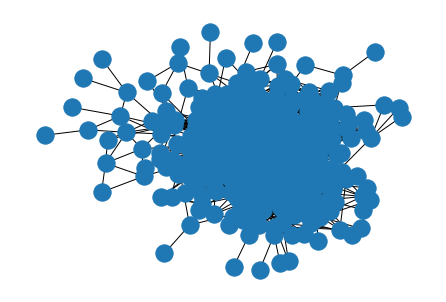

In [16]:
nx.draw_kamada_kawai(graph)

# EN Word2Vec Distance Matrix

In [23]:
text = '''In the language of visual design, a tag cloud (or word cloud) is one kind of "weighted list", as commonly used on geographic maps to represent the relative size of cities in terms of relative typeface size. An early printed example of a weighted list of English keywords was the "subconscious files" in Douglas Coupland's Microserfs (1995). A German appearance occurred in 1992.
The specific visual form and common use of the term "tag cloud" rose to prominence in the first decade of the 21st century as a widespread feature of early Web 2.0 websites and blogs, used primarily to visualize the frequency distribution of keyword metadata that describe website content, and as a navigation aid.
The first tag clouds on a high-profile website were on the photo sharing site Flickr, created by Flickr co-founder and interaction designer Stewart Butterfield in 2004. That implementation was based on Jim Flanagan's Search Referral Zeitgeist, a visualization of Web site referrers. Tag clouds were also popularized around the same time by Del.icio.us and Technorati, among others.
Oversaturation of the tag cloud method and ambivalence about its utility as a web-navigation tool led to a decline of usage among these early adopters. Flickr gave a five-word acceptance speech for the 2006 "Best Practices" Webby Award, which simply stated "sorry about the tag clouds."
A second generation of software development discovered a wider diversity of uses for tag clouds as a basic visualization method for text data. Several extensions of tag clouds have been proposed in this context.'''

In [96]:
min_count = 1
distance_threshold = 0.8
metric = 'cosine' # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

In [78]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [21]:
import gensim.downloader
model = gensim.downloader.load('word2vec-google-news-300')

In [79]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word_count = {}
for token, pos in nltk.pos_tag(nltk.word_tokenize(text)):
    word = None
    if pos.startswith('NN'):
        word = lemmatizer.lemmatize(token, 'n')
    elif pos.startswith('JJ'):
        word = lemmatizer.lemmatize(token, 'a')
    elif pos.startswith('VB'):
        word = lemmatizer.lemmatize(token, 'v')
    if word and word not in stopwords:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1

In [80]:
words = sorted(word_count.items(), key=lambda row: row[1], reverse=True)
words = [word for word, count in words if count >= min_count and word in model]

In [85]:
from scipy.spatial.distance import pdist, squareform

word_vectors = [model[word] for word in words]
distance_matrix = squareform(pdist(word_vectors, metric))

In [97]:
import itertools
import networkx as nx

graph = nx.Graph()
indices = list(range(len(words)))
for i in indices:
    graph.add_node(i)
for i, j in itertools.combinations(indices, 2):
    if distance_matrix[i, j] <= distance_threshold:
        graph.add_edge(i, j, weight=distance_matrix[i, j])
print(graph.number_of_nodes(), graph.number_of_edges())

109 575


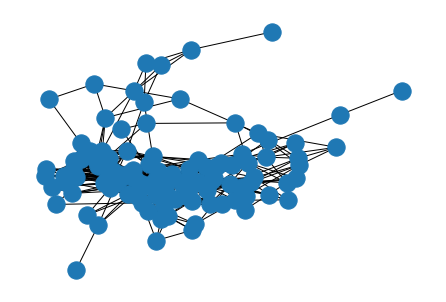

In [98]:
nx.draw(graph)

# Hierarchy Construction and Export

In [99]:
from community import community_louvain

dendrogram = community_louvain.generate_dendrogram(graph)
dendrogram.append({k: 0 for k in set(dendrogram[-1].values())})
for i, layer in enumerate(dendrogram):
    print(i)
    for (k, v) in sorted(layer.items()):
        print(f'  {i}-{k} {i + 1}-{v}')

0
  0-0 1-4
  0-1 1-1
  0-2 1-8
  0-3 1-3
  0-4 1-4
  0-5 1-4
  0-6 1-11
  0-7 1-0
  0-8 1-1
  0-9 1-0
  0-10 1-0
  0-11 1-3
  0-12 1-3
  0-13 1-4
  0-14 1-4
  0-15 1-4
  0-16 1-8
  0-17 1-11
  0-18 1-8
  0-19 1-11
  0-20 1-8
  0-21 1-0
  0-22 1-1
  0-23 1-8
  0-24 1-7
  0-25 1-11
  0-26 1-11
  0-27 1-8
  0-28 1-11
  0-29 1-4
  0-30 1-11
  0-31 1-4
  0-32 1-12
  0-33 1-12
  0-34 1-11
  0-35 1-11
  0-36 1-5
  0-37 1-2
  0-38 1-8
  0-39 1-8
  0-40 1-2
  0-41 1-2
  0-42 1-5
  0-43 1-2
  0-44 1-3
  0-45 1-2
  0-46 1-4
  0-47 1-4
  0-48 1-8
  0-49 1-0
  0-50 1-5
  0-51 1-4
  0-52 1-4
  0-53 1-8
  0-54 1-4
  0-55 1-4
  0-56 1-10
  0-57 1-1
  0-58 1-2
  0-59 1-8
  0-60 1-5
  0-61 1-11
  0-62 1-12
  0-63 1-12
  0-64 1-5
  0-65 1-0
  0-66 1-12
  0-67 1-12
  0-68 1-4
  0-69 1-4
  0-70 1-4
  0-71 1-4
  0-72 1-4
  0-73 1-8
  0-74 1-3
  0-75 1-4
  0-76 1-4
  0-77 1-6
  0-78 1-5
  0-79 1-7
  0-80 1-4
  0-81 1-3
  0-82 1-2
  0-83 1-5
  0-84 1-5
  0-85 1-8
  0-86 1-5
  0-87 1-11
  0-88 1-3
  0-89 1-9


In [100]:
data = []
for i, layer in enumerate(dendrogram):
    for (k, v) in sorted(layer.items()):
        item = {
            'id': f'{i}-{k}',
            'parentId': f'{i + 1}-{v}',
        }
        if i == 0:
            item['word'] = words[k]
            item['weight'] = word_count[words[k]]
        data.append(item)
data.append({
    'id': f'{len(dendrogram)}-0',
    'parentId': None
})
data

[{'id': '0-0', 'parentId': '1-4', 'word': 'cloud', 'weight': 9},
 {'id': '0-1', 'parentId': '1-1', 'word': 'tag', 'weight': 7},
 {'id': '0-2', 'parentId': '1-8', 'word': 'use', 'weight': 3},
 {'id': '0-3', 'parentId': '1-3', 'word': 'early', 'weight': 3},
 {'id': '0-4', 'parentId': '1-4', 'word': 'website', 'weight': 3},
 {'id': '0-5', 'parentId': '1-4', 'word': 'Flickr', 'weight': 3},
 {'id': '0-6', 'parentId': '1-11', 'word': 'visual', 'weight': 2},
 {'id': '0-7', 'parentId': '1-0', 'word': 'weighted', 'weight': 2},
 {'id': '0-8', 'parentId': '1-1', 'word': 'list', 'weight': 2},
 {'id': '0-9', 'parentId': '1-0', 'word': 'relative', 'weight': 2},
 {'id': '0-10', 'parentId': '1-0', 'word': 'size', 'weight': 2},
 {'id': '0-11', 'parentId': '1-3', 'word': 'term', 'weight': 2},
 {'id': '0-12', 'parentId': '1-3', 'word': 'first', 'weight': 2},
 {'id': '0-13', 'parentId': '1-4', 'word': 'Web', 'weight': 2},
 {'id': '0-14', 'parentId': '1-4', 'word': 'site', 'weight': 2},
 {'id': '0-15', 'pa

In [101]:
import json

with open('data.json', 'w') as f:
    json.dump(data, f, ensure_ascii=False)